# Zomato - Exploratory Data Analysis

In [339]:
your_local_path="E:/Anupam/HomeDocs/DataScience/UpX-Academy/DataAnalyticsWithPython/ExternalAssignments/Zomato/Dataset/"

In [619]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the Zomato CSV file and check if reading has been correct

In [620]:
zomato_pd = pd.read_csv (your_local_path + 'zomato.csv', encoding = 'ISO-8859-1')
zomato_pd = zomato_pd.rename(index=str, columns={'Rating text': 'Rating_text'})
zomato_pd = zomato_pd.rename(index=str, columns={'Aggregate rating': 'Aggregate_rating'})
zomato_pd = zomato_pd.rename(index=str, columns={'Average Cost for two': 'Average_Cost_for_two'})
xl = pd.ExcelFile(your_local_path + 'Country-Code.xlsx')

country_pd = xl.parse('Sheet1')
zomato_pd.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate_rating,Rating color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## 1. Display the summary statistics of the Zomato datasets

In [621]:
print(round(zomato_pd.describe(), 2))
# Find how many rows have null values
print(zomato_pd[zomato_pd.columns[zomato_pd.isnull().any()]].isnull().sum())

# since there are only 9 rows having null values, hence dropping them so that we have clean data
zomato_pd = zomato_pd.dropna()

       Restaurant ID  Country Code  Longitude  Latitude  Average_Cost_for_two  \
count        9551.00       9551.00    9551.00   9551.00               9551.00   
mean      9051128.35         18.37      64.13     25.85               1199.21   
std       8791521.28         56.75      41.47     11.01              16121.18   
min            53.00          1.00    -157.95    -41.33                  0.00   
25%        301962.50          1.00      77.08     28.48                250.00   
50%       6004089.00          1.00      77.19     28.57                400.00   
75%      18352291.50          1.00      77.28     28.64                700.00   
max      18500652.00        216.00     174.83     55.98             800000.00   

       Price range  Aggregate_rating     Votes  
count      9551.00           9551.00   9551.00  
mean          1.80              2.67    156.91  
std           0.91              1.52    430.17  
min           1.00              0.00      0.00  
25%           1.00       

## 2. Next we build the relationship of Rating of Price Range and Country

In [622]:
# Merge the country and Zomato dataset
zomato_pd = pd.merge(zomato_pd, country_pd, on = 'Country Code', how = 'inner')
zomato_pd
#Build the pivot table to show relationship between country, pricerange of restaurant and their ratings
table2 = pd.pivot_table(zomato_pd, values=('Aggregate_rating'), index=['Country'],columns= ['Price range'], aggfunc=np.mean)
table2

Price range,1,2,3,4
Country,,,,
Australia,3.725000,3.700000,3.700000,2.600000
Brazil,1.900000,2.528571,3.600000,4.191429
Canada,NaN,3.333333,NaN,4.300000
India,1.932107,2.855108,3.569307,3.628866
Indonesia,NaN,3.700000,4.325000,NaN
New Zealand,4.700000,4.300000,4.294118,4.137500
Phillipines,NaN,4.500000,4.416667,4.533333
Qatar,NaN,4.300000,3.720000,4.164286
Singapore,NaN,4.200000,3.520000,3.550000


## 3. Next we analyse No of outlets in each country and their percentage

In [623]:
#No. of unique countries & number of restro listed in data set
no_of_outlets = pd.DataFrame(zomato_pd.Country.value_counts())

no_of_outlets['Percentage'] = round(zomato_pd.Country.value_counts()/sum(zomato_pd.Country.value_counts()) * 100, 2)
no_of_outlets

,Country,Percentage
India,8652,90.67
United States,425,4.45
United Kingdom,80,0.84
South Africa,60,0.63
UAE,60,0.63
Brazil,60,0.63
New Zealand,40,0.42
Turkey,34,0.36
Australia,24,0.25
Phillipines,22,0.23


## 4. Below is the anaysis of Rating Text Vs No of outlets 

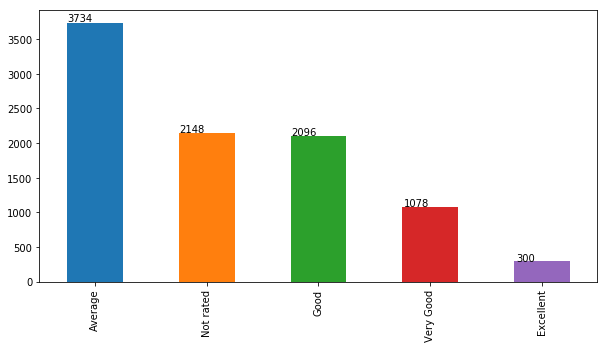

In [624]:
plt.figure(figsize=(10,5))
ax = zomato_pd.loc[:,:].Rating_text.value_counts().head(5).plot.bar()
#for getting the values on each bar
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() * 1.005, i.get_height() * 1.005))


## 5. Since India has the highest outlet, we analyse no of outlets in top cities in India

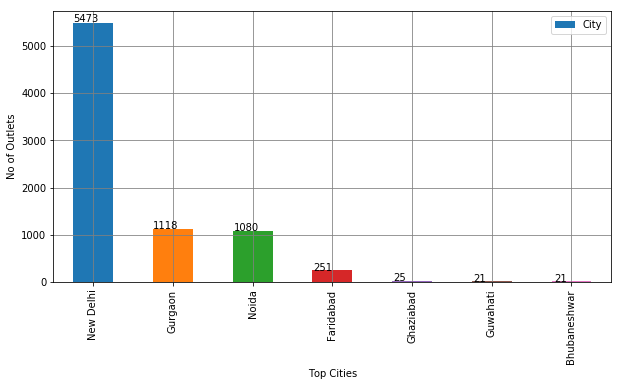

In [625]:
plt.figure(figsize=(10,5))
ax = zomato_pd.loc[zomato_pd.Country == "India"].City.value_counts().head(7).plot.bar()
plt.xlabel("Top Cities")
plt.ylabel("No of Outlets")
plt.xlabel("Top Cities", labelpad = 5)
plt.ylabel("No of Outlets")
plt.legend()
plt.grid(True, color='grey')

for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() * 1.005, i.get_height() * 1.005))
plt.show()

## 6. Lets Analyse No of Outlets of top 15 Restaurants

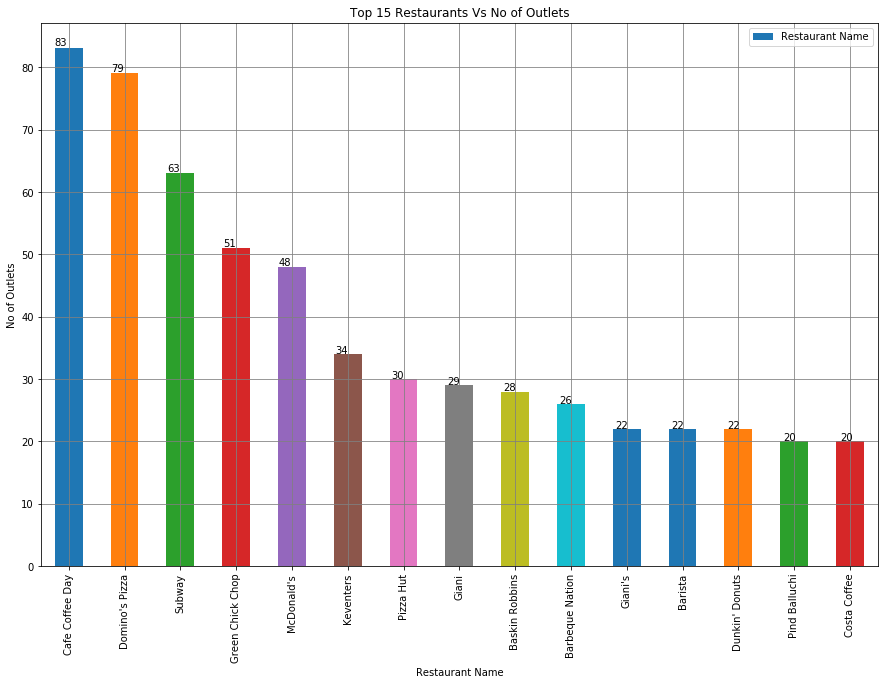

In [640]:
#Top 15 Resturants with maximum number of outlets
plt.figure(figsize=(15,10))
ax=zomato_pd['Restaurant Name'].value_counts().head(15).plot.bar()
plt.title("Top 15 Restaurants Vs No of Outlets")
plt.xlabel("Restaurant Name", labelpad = 5)
plt.ylabel("No of Outlets")
plt.legend()
plt.grid(True, color='grey')

for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() * 1.005, i.get_height() * 1.005))
plt.show()

## 7. Which cusine is popular in top 10 Indian Cities

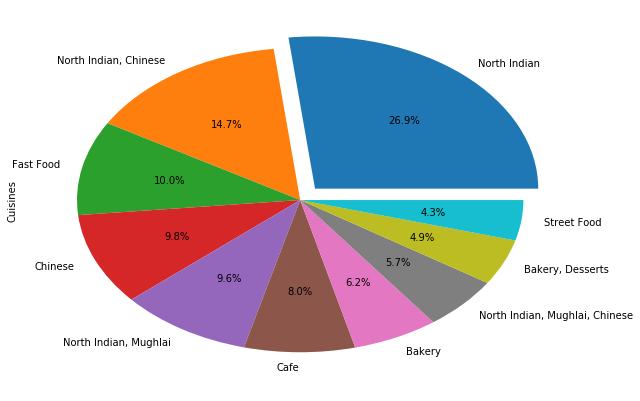

In [628]:
plt.figure(figsize=(10,7))
zomato_pd.loc[zomato_pd.Country == "India"].Cuisines.value_counts().head(10).plot.pie(explode = (0.1,0,0,0,0,0,0,0,0,0), 
                                                                                      autopct = '%1.1f%%')

## 8. Analysis of Rating Vs Avg Cost of 2 people

No handles with labels found to put in legend.


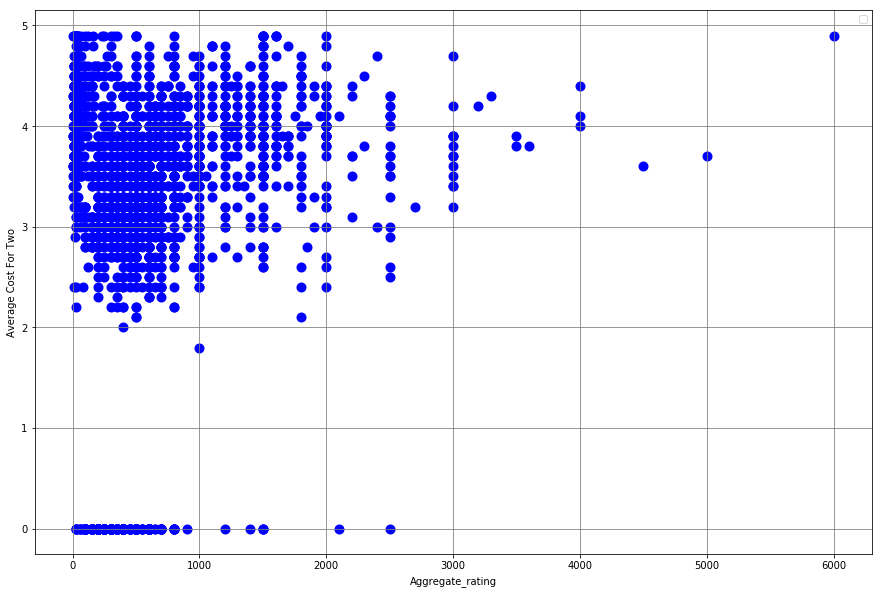

In [629]:
plt.figure(figsize=(15,10))
x = zomato_pd['Aggregate_rating'].head(2500)
y = zomato_pd['Average_Cost_for_two'].head(2500)
plt.xlabel("Aggregate_rating", labelpad = 5)
plt.ylabel("Average Cost For Two")
plt.legend()
plt.grid(True, color='grey')
y.head()

plt.scatter(y,x, label = "Rating Vs Avg Cost of 2 people", color ='b',  linewidth = 4)

## 9. Let us now analyse the ratings if it follows normal distribution

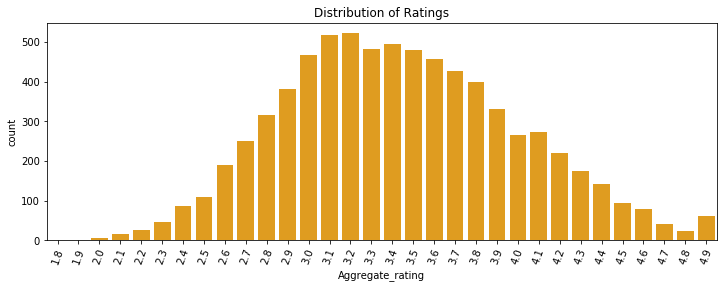

In [630]:
rating = ['Aggregate rating', 'Votes']
rating_df = zomato_pd.loc[zomato_pd.Aggregate_rating >0]
f, ax = plt.subplots(1,1, figsize = (12, 4))
sns.countplot(rating_df['Aggregate_rating'], ax = ax, color = 'orange')
ax.tick_params('x', rotation = 70)
ax.set_title('Distribution of Ratings')
plt.show()

## 10. New Delhi has the highest restaurants. Lets analyse Price Range of restaurants in New Delhi

C:\Users\Anupam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


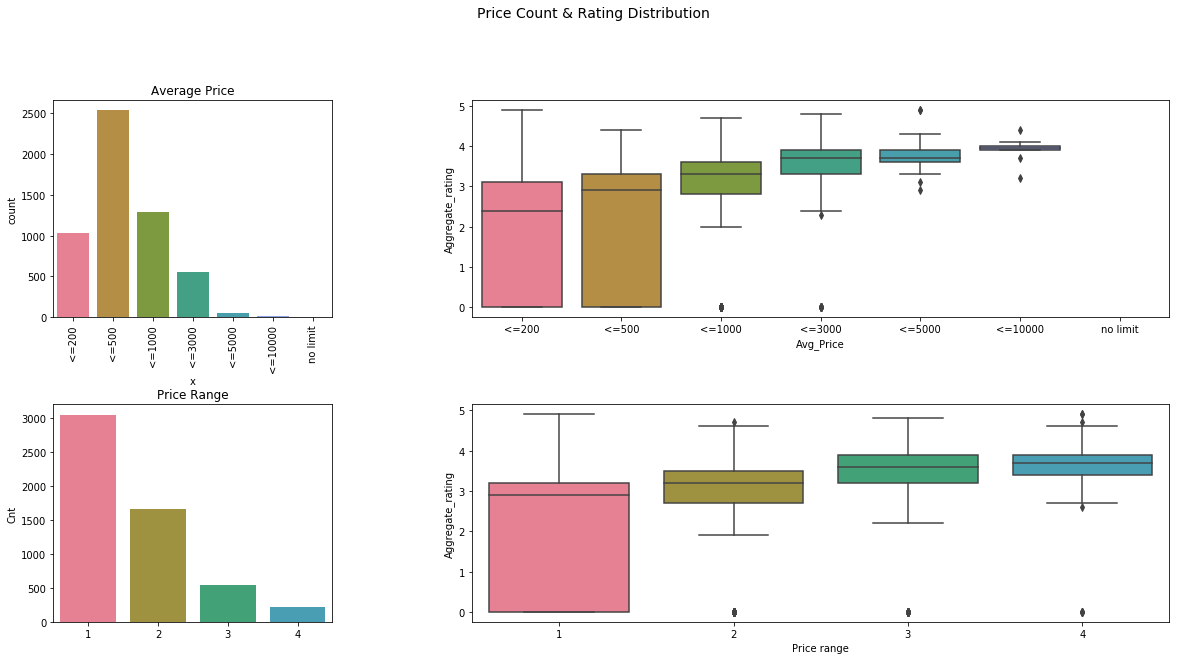

In [631]:
f = plt.figure(figsize = (20,10))
df_city = zomato_pd.loc[(zomato_pd['Country'] == 'India') & (zomato_pd['City'] == 'New Delhi'), :] # It a good idea to use explicit :
#print(df_city.head())

#Lets put the values into bins
df_city['Avg_Price'] = pd.cut(df_city['Average_Cost_for_two'], bins = [0, 200, 500, 1000, 3000, 5000,10000, 800000000], 
                               labels = ['<=200', '<=500', '<=1000', '<=3000', '<=5000', '<=10000', 'no limit'])
# Plot the 1st graph
ax = plt.subplot2grid((2,3), (0,0))
sns.countplot(df_city['Avg_Price'], ax = ax, palette = sns.color_palette('husl', 7))
ax.set_title('Average Price')
ax.set_xlabel('x')
ax.tick_params('x', rotation = 90)

# Plot the 2nd graph
ax = plt.subplot2grid((2,3), (0,1), colspan = 2)
sns.boxplot(x = 'Avg_Price', y = 'Aggregate_rating', data = df_city, ax = ax, palette = sns.color_palette('husl', 7))
cnt = df_city['Price range'].value_counts().reset_index()
cnt.columns = ['Price range', 'Cnt']

# Plot the 3rd graph
ax = plt.subplot2grid((2,3), (1,0))
sns.barplot(x = 'Price range', y = 'Cnt', data = cnt, ax=ax, palette = sns.color_palette('husl', 5))
ax.set_title('Price Range')
ax.set_xlabel('')

# Plot the 4th graph
ax = plt.subplot2grid((2,3), (1,1), colspan = 2)
sns.boxplot(x='Price range', y ='Aggregate_rating', data = df_city, ax = ax, palette = sns.color_palette('husl', 5))
plt.subplots_adjust(wspace = 0.5, hspace = 0.4, top = 0.85)
plt.suptitle('Price Count & Rating Distribution', size = 14)
plt.show()


## 11. Analyse the Pier Plot of top 3 cities in India

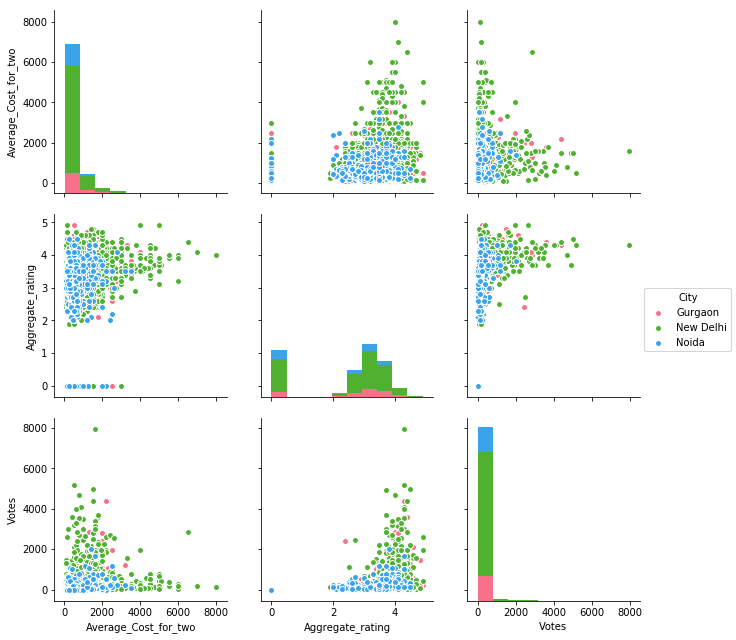

In [632]:
# Get the top 3 cities in India having maximum number of outlets
zomato_city = zomato_pd.loc[zomato_pd.Country == "India"].City.value_counts().head(3).index
zomato_city = zomato_pd.loc[zomato_pd['City'].isin(zomato_city)]

# Build the data frame of the 3 variables and the chosen city
zomato_pair = zomato_city[['City', 'Average_Cost_for_two', 'Aggregate_rating', 'Votes']]

sns.pairplot(zomato_pair, hue='City', palette="husl", size =3)
plt.show()

## 12. Location Visualization of restaurants in USA

In [633]:
import gmplot

USA_df = zomato_pd.loc[zomato_pd['Country'] == 'United States']
USA_df = USA_df[['Country', 'City', 'Latitude', 'Longitude']]


gmap4 = gmplot.GoogleMapPlotter(43.6150, -84.221535, 4)
#gmap4.scatter(USA_df.Latitude, USA_df.Longitude, '#3B0B39', size=1000, marker=False)
gmap4.heatmap(USA_df.Latitude, USA_df.Longitude)

# Draw
gmap4.draw("Restaurants in USA.html")


## 13. Factor Analysis - Lets analyse if Price, Rating andAverage Cost for Two have any impact on each other

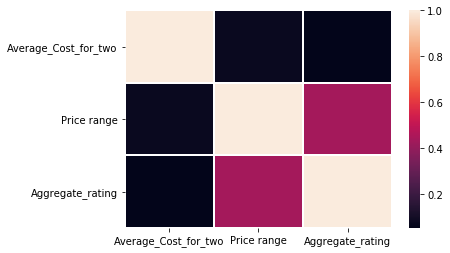

In [639]:
#Correlation among avg cost, price range, agg rating

zomato_corr = zomato_pd[['Average_Cost_for_two', 'Price range', 'Aggregate_rating']]
sns.heatmap(zomato_corr.corr(),linewidth=1.0)

## 14. Showing comparizon of Votes Vs Ratings and Price Range Vs Ratings
#### This should show if Votes and Price Range have any correlation with Voting

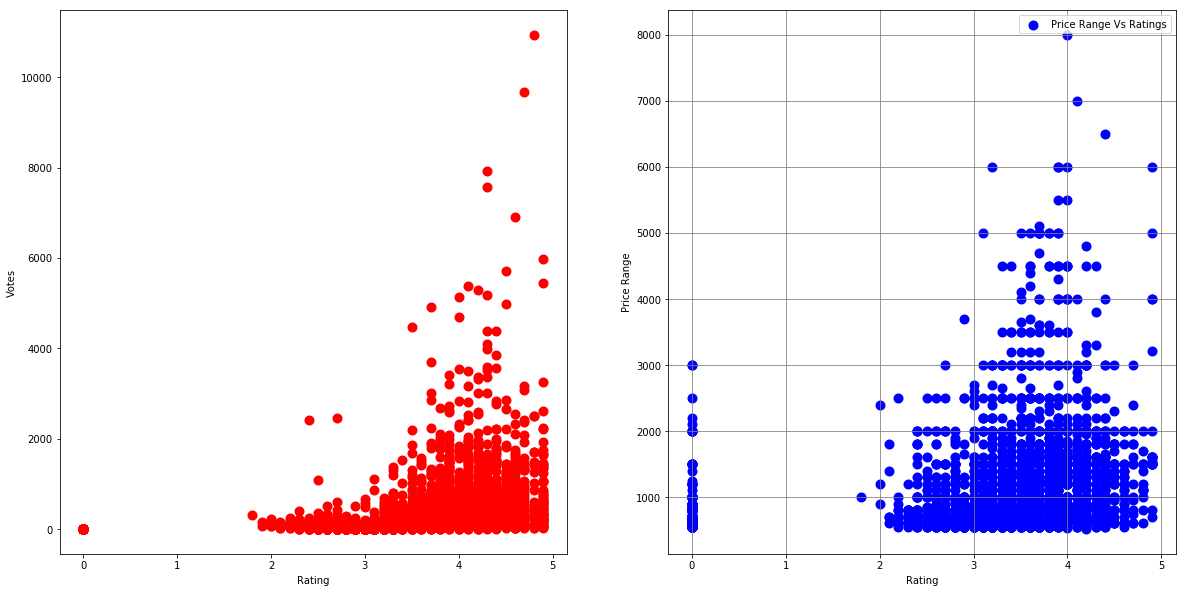

In [634]:
plt.figure(figsize = (20,10))

plt.subplots_adjust(hspace= 0.2, wspace= 0.2)
plt.subplot(1,2,1)         #Devide the plot area into 2X2 subplots, Plot 1
x = zomato_pd['Aggregate_rating']
y = zomato_pd['Votes']
plt.scatter(x,y,label = "Votes Vs Ratings", color ='red',  linewidth = 4)
plt.xlabel("Rating", labelpad = 5)
plt.ylabel("Votes")

plt.subplot(1,2,2)         # Plot 2
avg_cost = zomato_pd.loc[(zomato_pd['Average_Cost_for_two'] > 500)  & (zomato_pd['Average_Cost_for_two'] < 9000)]
          
x = avg_cost['Aggregate_rating']
y = avg_cost['Average_Cost_for_two']

plt.scatter(x,y,label = "Price Range Vs Ratings", color ='blue',  linewidth = 4)
plt.xlabel("Rating", labelpad = 5)
plt.ylabel("Price Range")

plt.legend()
plt.grid(True, color='grey')
plt.show()

## 15. Analysis of High Rating Restaurants(rating > 4.8) and Economical(price for two people <1000)

In [635]:
rating_cost = (zomato_pd.loc[(zomato_pd['Aggregate_rating'] > 4.8)  & (zomato_pd['Average_Cost_for_two'] < 1000) & 
                             (zomato_pd['Average_Cost_for_two'] > 0)])
rating_cost = rating_cost[['Country', 'City', 'Restaurant Name', 'Aggregate_rating', 'Average_Cost_for_two']]
rating_cost

,Country,City,Restaurant Name,Aggregate_rating,Average_Cost_for_two
10,Phillipines,Pasig City,Silantro Fil-Mex,4.9,800
39,Brazil,Brasí_lia,Coco Bambu,4.9,230
48,Brazil,Rio de Janeiro,Braseiro da Gíçvea,4.9,100
50,Brazil,Rio de Janeiro,Garota de Ipanema,4.9,120
120,United States,Augusta,Rae's Coastal Cafe,4.9,40
169,United States,Cedar Rapids/Iowa City,Shorts Burger and Shine,4.9,10
205,United States,Dalton,Oakwood Cafe,4.9,10
227,United States,Davenport,Tantra Asian Bistro,4.9,25
242,United States,Des Moines,The Cafe,4.9,25
291,United States,Gainesville,Atlanta Highway Seafood Market,4.9,25
